In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestRegressor

In [2]:
# loading dataset

# read dataset
df1 = pd.read_csv("datasets/housePrice.csv")

# take a copy of dataset
df = df1.copy()

# convert Area to numeric feature
df['Area'] = pd.to_numeric(df['Area'], errors='coerce') 


# show the first 10 rows from dataset
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70.0,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87.0,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59.0,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54.0,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71.0,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [3]:
# Remove missing values from dataset

# print number missing value before handling in each column
print("the sum of null values in dataset befor handling missing values:")
print(df.isnull().sum()) 

# drop missing values from dataset
df = df.dropna(axis=0) # remove rows that contain missing value
print("*" * 50)

# print number missing value after handling in each column
print("the sum of null values in dataset after handling missing values:")
print(df.isnull().sum())

the sum of null values in dataset befor handling missing values:
Area           6
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64
**************************************************
the sum of null values in dataset after handling missing values:
Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64


In [4]:
# convert categorical features to numerical

# Creating a instance of label Encoder.
le = LabelEncoder()

# creating list that contain catefories features
categories = ["Elevator", "Warehouse", "Parking","Address"]


# apply LabelEncoder on all categorical features
for item in categories:
    label = le.fit_transform(df[item])
    df[item] = label




# show data after that
print("this data after converting:")
df.head(10)


this data after converting:


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63.0,1,1,1,1,156,1.850000e+09,61666.67
1,60.0,1,1,1,1,156,1.850000e+09,61666.67
2,79.0,2,1,1,1,117,5.500000e+08,18333.33
3,95.0,2,1,1,1,152,9.025000e+08,30083.33
4,123.0,2,1,1,1,150,7.000000e+09,233333.33
5,70.0,2,1,1,0,106,2.050000e+09,68333.33
6,87.0,2,1,1,1,117,6.000000e+08,20000.00
7,59.0,1,1,1,1,156,2.150000e+09,71666.67
8,54.0,2,1,1,0,13,4.930000e+08,16433.33
9,71.0,1,1,1,1,183,2.370000e+09,79000.00


In [5]:
# remove duplicated rows

# remove duplicated rows fom dataset
df_duplicates_removed = df.drop_duplicates()

print("the shape of dataset befor remove duplicated rows is: {}".format(df.shape))
print("the shape of dataset after remove duplicated rows is: {}".format(df_duplicates_removed.shape))
print("number of rows that is removed is: {}".format(df.shape[0] - df_duplicates_removed.shape[0]))

the shape of dataset befor remove duplicated rows is: (3450, 8)
the shape of dataset after remove duplicated rows is: (3242, 8)
number of rows that is removed is: 208


In [6]:
# show correlated attributes 
correlated_features1 = set()
correlated_features2 = set()

# the matrix that represent correlation
correlation_matrix = df.corr()

# show correlation matrix
print("array of correlation between features is:")
print(correlation_matrix)

# put features correlated bigger than 0.8 and less than -0.8 in two sets
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features1.add(colname)
        elif correlation_matrix.iloc[i, j] < -0.8:
            colname = correlation_matrix.columns[i]
            correlated_features2.add(colname)
            
# combination two sets in one set            
correlated_features1.update(correlated_features2)

# show features that correlated greater than 0.8 and less than -0.8
print("the correlated features that greater than 0.8 and less than -0.8 is: {}".format(correlated_features1))


array of correlation between features is:
                Area      Room   Parking  Warehouse  Elevator   Address  \
Area        1.000000  0.672955  0.197890   0.076161  0.051473 -0.127673   
Room        0.672955  1.000000  0.274425   0.129649  0.180380 -0.075674   
Parking     0.197890  0.274425  1.000000   0.431925  0.430213  0.021754   
Warehouse   0.076161  0.129649  0.431925   1.000000  0.202708  0.017290   
Elevator    0.051473  0.180380  0.430213   0.202708  1.000000  0.072955   
Address    -0.127673 -0.075674  0.021754   0.017290  0.072955  1.000000   
Price       0.722611  0.567872  0.191221   0.109676  0.111745 -0.075901   
Price(USD)  0.722611  0.567872  0.191221   0.109676  0.111745 -0.075901   

               Price  Price(USD)  
Area        0.722611    0.722611  
Room        0.567872    0.567872  
Parking     0.191221    0.191221  
Warehouse   0.109676    0.109676  
Elevator    0.111745    0.111745  
Address    -0.075901   -0.075901  
Price       1.000000    1.000000  
Pr

In [7]:
# remove all features that correlated greater than 0.8 and less than -0.8 from dataset
df.drop(labels=correlated_features1, axis=1, inplace=True)


In [8]:
# create new file contain dataset after preprocessing
df.to_csv("datasets after cleaning/clean_regression_dataset.csv")


In [9]:
# splitting dataset to training data and testing data

# target column
target_col = "Price"

# X_train dataset
X_train = df.drop(columns=[target_col])

# y_train dataset contains one feature ("price" only)
y_train = df.loc[:, target_col]

# split dataset with 70% training data and 30% testing data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0) 

# print the shape for each dataset 
print(f"shape of X_train: {X_train.shape}")
print(f"shape of y_train: {y_train.shape}")
print(f"shape of X_test: {X_test.shape}")
print(f"shape of y_train: {y_test.shape}")

shape of X_train: (2415, 6)
shape of y_train: (2415,)
shape of X_test: (1035, 6)
shape of y_train: (1035,)


In [10]:
# apply scaling to all dataset
X_train = scale(X_train)
X_test = scale(X_test)
y_train = scale(y_train)
y_test = scale(y_test)

C:\Users\mm\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\mm\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [11]:
# apply LinearRegression Algorithm 
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_linear = model.predict(X_test)

# calculat Accuracy and LinearRegression Metrices 
Accuracy=r2_score(y_test,y_pred_linear)*100
print("Accuracy of the model is: {}".format(Accuracy))
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred_linear)))
print("intercept is: {}".format(model.intercept_))
print("slope is: {}".format(model.coef_))

Accuracy of the model is: 63.359538990192085
Mean squared error: 0.3664046100980791
intercept is: -3.8266908224462935e-17
slope is: [5.26725563e-01 2.17494893e-01 2.95958098e-04 4.27457599e-02
 4.62029303e-02 2.14791493e-04]


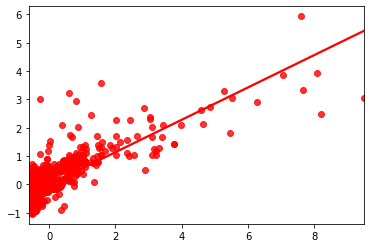

In [12]:
# Draw a forecast chart linearRegression
sns.regplot(x=y_test,y=y_pred_linear,ci=None,color ='red');

In [13]:
# apply RandomForestRegressor Algorithm 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)
y_pred_forest = regressor.predict(X_test)

# calculat Accuracy and mean_squared_error 
Accuracy=r2_score(y_test,y_pred_forest)*100
print("Accuracy of the model is: {}".format(Accuracy))
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred_forest)))

Accuracy of the model is: 68.29262777272682
Mean squared error: 0.3170737222727319


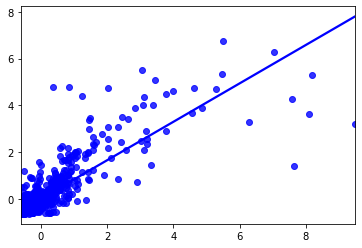

In [14]:
# Draw a forecast chart RandomForestRegressor
sns.regplot(x=y_test,y=y_pred_forest,ci=None,color ='blue');